In [34]:
import numpy as np
from utils.database_repository import DataRepository
from utils.objects import *
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [2]:
repository = DataRepository()

Connected to MySQL Server version  5.7.39-42-log


In [3]:
test_case_name = "DiningPhilosophers"
dut_name = "Surface4Pro"
dut_os = "Win32NT"
profiler_name = "IntelPowerGadget"

min_temp = 0
max_temp = 200

min_battery = 1
max_battery = 100

between = 0
duration = 2

version = 4

language = "CSharp"
env = "PROD"

limit = 200

In [4]:
energy_profiler = EnergyProfiler(profiler_name, repository)

energy_profiler.id, energy_profiler.energy_profiler_name


(1, 'IntelPowerGadget')

In [5]:
dut = Dut(dut_name, dut_os, repository)

dut.id, dut.dut_name, dut.dut_os

(6, 'Surface4Pro', 'Win32NT')

In [6]:
config = Configuration(min_temp, max_temp, min_battery, max_battery, duration, between, version, repository, env)

config.id, config.min_battery, config.max_battery, config.min_temp, config.max_temp, config.version, config.env, config.duration, config.between

(13, 1, 100, 0, 200, 4, 'PROD', 2, 0)

In [7]:
test_case = TestCase(test_case_name, repository)
test_case.id, test_case.test_case_name

(2, 'DiningPhilosophers')

In [8]:
experiment = Experiment(config.id, dut.id, test_case.id, language, repository, 200)
len(experiment.experiments), experiment.config_id, experiment.dut_id, experiment.language, experiment.test_case_id, experiment.count


(14, 13, 6, 'CSharp', 2, 200)

In [9]:
temp_experiment = experiment.experiments[0]

temp_experiment.end_time, temp_experiment.start_time, temp_experiment.runs, temp_experiment.iteration, temp_experiment.duration

(datetime.datetime(2022, 10, 24, 12, 55, 59, 770991),
 datetime.datetime(2022, 10, 24, 12, 53, 43, 260224),
 247,
 13,
 120967)

In [10]:
durations = [x.duration / x.runs for x in experiment.experiments]
dram_avg = [x.AverageDRAMPower0InWatt for x in experiment.experiments]
gt_power_avg = [x.AverageGTPower0InWatt for x in experiment.experiments]
ai_power_avg = [x.AverageIAPower0InWatt for x in experiment.experiments]
processor_power_avg = [x.AverageProcessorPower0InWatt for x in experiment.experiments]

durations, dram_avg, ai_power_avg, processor_power_avg

[x.iteration for x in experiment.experiments]

[13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 1]

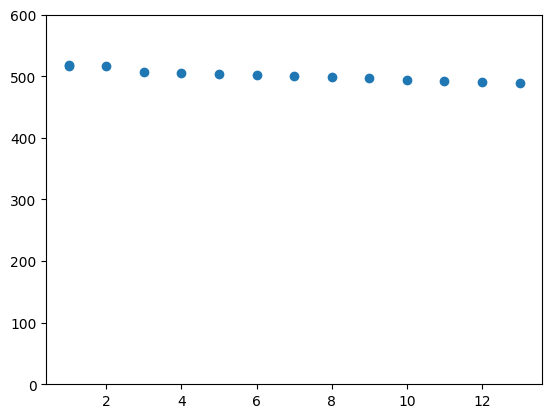

In [14]:


tuples_to_plot = [(x.iteration, x.duration / x.runs) for x in experiment.experiments]

plt.scatter(*zip(*tuples_to_plot))
plt.ylim(0,600)
plt.show()

In [33]:
from audioop import avg


groups = defaultdict(list)
values = defaultdict(dict)

for obj in experiment.experiments:
    groups[obj.iteration].append(obj)

tuples_to_plot = []

for g in groups:
    if not g in values:
        values[g] = {}
    
    avg_duration = [x.duration / x.runs for x in groups[g]]
    
    values[g]["avg_duration"] = sum(avg_duration) / len(avg_duration)  
    values[g]["std_duration"] = np.std(duration)

values

# tuples_to_plot = [(groups[x][0].iteration, groups[x].duration / groups[x].runs) for x in groups]

# plt.scatter(*zip(*tuples_to_plot))
# plt.ylim(0,600)
# plt.show()

defaultdict(dict,
            {13: {'avg_duration': 489.7449392712551},
             12: {'avg_duration': 491.4918699186992},
             11: {'avg_duration': 493.0285714285714},
             10: {'avg_duration': 494.46311475409834},
             9: {'avg_duration': 496.5308641975309},
             8: {'avg_duration': 498.3057851239669},
             7: {'avg_duration': 500.08298755186723},
             6: {'avg_duration': 501.5625},
             5: {'avg_duration': 503.36401673640165},
             4: {'avg_duration': 505.30252100840335},
             3: {'avg_duration': 506.9409282700422},
             2: {'avg_duration': 516.3728813559322},
             1: {'avg_duration': 517.836170212766}})